<a href="https://colab.research.google.com/github/rangasuthan/Tesla-Stock-Price-Analysis-and-Trend-Prediction-Using-HMM/blob/main/Stock_Market_Trend_Prediction_Using_Hidden_Markov_Model_(HMM)_on_Tesla_Stock_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install hmmlearn pandas numpy matplotlib seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 2.7 MB/s eta 0:00:00


In [3]:
import pandas as pd

# Load the Tesla stock price dataset
data = pd.read_csv('/content/Tesla_Stock.csv')

# Display the first few rows of the dataset
data.head()


,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [4]:
# Create features: daily price changes (difference between close and open prices)
data['Price_Change'] = data['Close'] - data['Open']

# Convert 'Date' column to datetime and sort the data by date
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')

# Create a binary column 'Trend' where 1 indicates stock price increased, 0 means it decreased
data['Trend'] = data['Price_Change'].apply(lambda x: 1 if x > 0 else 0)

# Select relevant columns for the HMM
X = data[['Open', 'High', 'Low', 'Close', 'Volume']].values
y = data['Trend'].values  # Observation (up or down)

# Display the first few rows of the processed data
data.head()


,Date,Open,High,Low,Close,Volume,Adj Close,Price_Change,Trend
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999,4.889999,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000,-1.960001,0
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999,-3.040001,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001,-3.799999,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001,-3.889999,0


In [5]:
from hmmlearn import hmm
import numpy as np

# Initialize a Gaussian HMM with 2 hidden states (bullish, bearish market)
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100)

# Fit the HMM model to the stock price data
model.fit(X)

# Predict hidden states for the stock data
hidden_states = model.predict(X)

# Add the hidden states to the dataframe
data['Hidden_State'] = hidden_states

# Display the data with hidden states
data[['Date', 'Open', 'Close', 'Hidden_State']].head()


,Date,Open,Close,Hidden_State
0,2010-06-29,19.000000,23.889999,1
1,2010-06-30,25.790001,23.830000,1
2,2010-07-01,25.000000,21.959999,1
3,2010-07-02,23.000000,19.200001,1
4,2010-07-06,20.000000,16.110001,1


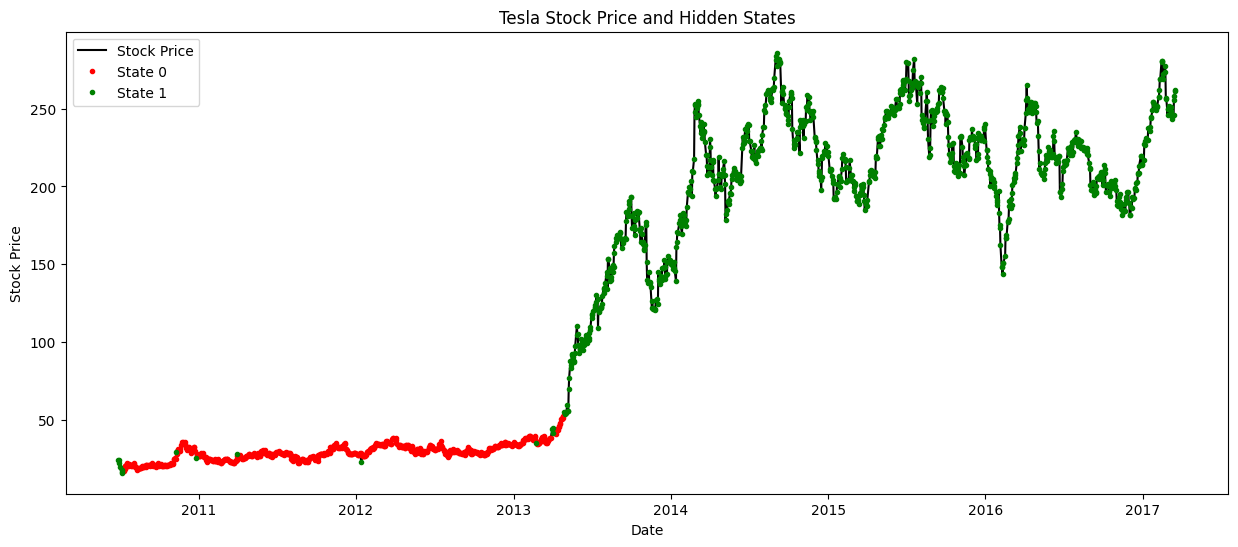

In [6]:
import matplotlib.pyplot as plt

# Plot the stock price and the hidden states
plt.figure(figsize=(15, 6))

# Plot stock closing price
plt.plot(data['Date'], data['Close'], label='Stock Price', color='black')

# Highlight regions based on hidden states
colors = ['red', 'green']  # Assign colors to states (e.g., red = bearish, green = bullish)
for state in range(model.n_components):
    mask = hidden_states == state
    plt.plot(data['Date'][mask], data['Close'][mask], '.', label=f'State {state}', color=colors[state])

plt.title('Tesla Stock Price and Hidden States')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [7]:
# Predict the most likely sequence of hidden states for the future
logprob, future_states = model.decode(X, algorithm="viterbi")

# Display the most likely sequence of hidden states
print("Most likely sequence of hidden states:", future_states)

# Predict the next observation (future stock price trend)
next_hidden_state = model.predict([X[-1]])  # Predict the next hidden state based on the last data point
print(f"The predicted next hidden state is: {next_hidden_state}")


Most likely sequence of hidden states: [1 1 1 ... 1 1 1]
The predicted next hidden state is: [1]
